Assignment-7:

Apply SVM as a non-linear classifer to solve the following classifcation problem:

(i) Download CIFAR 10 from Kaggle and load in to the module.

(ii) Pre-process these downloaded data: cleaning up variable to prevent loading data multiple times.

(iii) Print the total output size of training and test samples to check sanity.

(iv) Visual some samples of training data using "matplotlib.pyplot" and "plt".

(v) Apply cross-validation techniques to split the data samples into train, test and validation sets.

(vi) To run the code faster, create a small development set as a subset of the training data.

(vii) Show train, test and Val data shape and labels.

(viii) Pre-processing: reshape the image samples into rows.

(ix) Compute mean image after zero centering the data.

(x) Subtract the mean image from training and testing data.

(xi) Now append a dimension i.e. a bias value 1 so that SVM only optimize weight matrix W.

(xii) Show the shapes of train, test and validation data.

(xiii) Apply SVM to compute loss and the gradient.

(xiv) Add a regularization to the loss and compute the gradient of loss with respect to weight parameter.


i) CIFAR-10 is already readily available for download within Colab using the tensorflow.keras.datasets library

* Establish Connection between drive & colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read cifar-10-batches-py folder & print names of files containing in it

In [ ]:
import os

# Replace 'folder_name' with the actual folder name on your Drive
folder_path = '/content/drive/My Drive/Colab Notebooks/cifar-10-batches-py'
files = os.listdir(folder_path)

print(files)  # This will print a list of filenames in the folder

['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5', 'test_batch', 'batches.meta', 'spam.csv', 'readme.html']


In [ ]:
import numpy as np
import pickle
import os
import tarfile

ii) Pre-process these downloaded data: cleaning up variable to prevent loading data multiple times.

In [ ]:
def load_cifar10(data_dir):
    def unpickle(file):
        with open(file, 'rb') as fo:
            dict = pickle.load(fo, encoding='bytes')
        return dict

    train_data = []
    train_labels = []

    for i in range(1, 6):
        data_dict = unpickle(os.path.join(data_dir, f'data_batch_{i}'))
        train_data.append(data_dict[b'data'])
        train_labels += data_dict[b'labels']

    train_data = np.concatenate(train_data)
    train_labels = np.array(train_labels)

    test_data_dict = unpickle(os.path.join(data_dir, 'test_batch'))
    test_data = test_data_dict[b'data']
    test_labels = np.array(test_data_dict[b'labels'])

    return train_data, train_labels, test_data, test_labels


In [ ]:
data_dir = '/content/drive/My Drive/Colab Notebooks/cifar-10-batches-py'
train_data, train_labels, test_data, test_labels = load_cifar10(data_dir)

iii) Print the total output size of training and test samples to check sanity.

In [ ]:
print("Training data shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("Testing data shape:", test_data.shape)
print("Testing labels shape:", test_labels.shape)

Training data shape: (50000, 3072)
Training labels shape: (50000,)
Testing data shape: (10000, 3072)
Testing labels shape: (10000,)


(iv) Visual some samples of training data using "matplotlib.pyplot" and "plt".

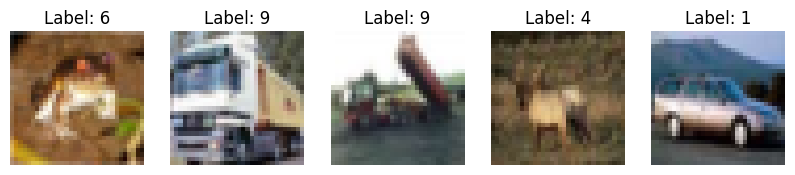

In [ ]:
import matplotlib.pyplot as plt

# Function to plot some sample images
def plot_samples(data, labels, samples=5):
    fig, axes = plt.subplots(1, samples, figsize=(10, 2))
    for i in range(samples):
        axes[i].imshow(data[i].reshape(3, 32, 32).transpose(1, 2, 0))
        axes[i].set_title(f'Label: {labels[i]}')
        axes[i].axis('off')
    plt.show()

plot_samples(train_data, train_labels)


(v) Apply cross-validation techniques to split the data samples into train, test and validation sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training, validation, and test sets
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.1, random_state=42)


(vi) To run the code faster, create a small development set as a subset of the training data.

In [ ]:
dev_data = train_data[:500]
dev_labels = train_labels[:500]

(vii) Show train, test and Val data shape and labels.

In [ ]:
print("Train data shape:", train_data.shape)
print("Train labels shape:", train_labels.shape)
print("Validation data shape:", val_data.shape)
print("Validation labels shape:", val_labels.shape)
print("Development data shape:", dev_data.shape)
print("Development labels shape:", dev_labels.shape)
print("Test data shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)

Train data shape: (45000, 3072)
Train labels shape: (45000,)
Validation data shape: (5000, 3072)
Validation labels shape: (5000,)
Development data shape: (500, 3072)
Development labels shape: (500,)
Test data shape: (10000, 3072)
Test labels shape: (10000,)


(viii) Pre-processing: reshape the image samples into rows.

In [ ]:
train_data = train_data.reshape(train_data.shape[0], -1)
val_data = val_data.reshape(val_data.shape[0], -1)
test_data = test_data.reshape(test_data.shape[0], -1)
dev_data = dev_data.reshape(dev_data.shape[0], -1)

In [ ]:
train_data = train_data.astype(np.float64)
val_data = val_data.astype(np.float64)
test_data = test_data.astype(np.float64)
dev_data = dev_data.astype(np.float64)

(ix) Compute mean image after zero centering the data.

In [ ]:
mean_image = np.mean(train_data, axis=0)
mean_image

array([-1.15815308e-13,  7.38509698e-14, -7.50080492e-15, ...,
       -8.24618004e-14,  3.74257070e-14,  1.00000000e+00])

(x) Subtract the mean image from training and testing data.

In [ ]:
train_data -= mean_image
val_data -= mean_image
test_data -= mean_image
dev_data -= mean_image

(xi) Now append a dimension i.e. a bias value 1 so that SVM only optimize weight matrix W.

In [ ]:
train_data = np.hstack([train_data, np.ones((train_data.shape[0], 1))])
val_data = np.hstack([val_data, np.ones((val_data.shape[0], 1))])
test_data = np.hstack([test_data, np.ones((test_data.shape[0], 1))])
dev_data = np.hstack([dev_data, np.ones((dev_data.shape[0], 1))])

(xii) Show the shapes of train, test and validation data.

In [ ]:
print("Train data shape after adding bias:", train_data.shape)
print("Validation data shape after adding bias:", val_data.shape)
print("Test data shape after adding bias:", test_data.shape)
print("Development data shape after adding bias:", dev_data.shape)

Train data shape after adding bias: (45000, 3073)
Validation data shape after adding bias: (5000, 3073)
Test data shape after adding bias: (10000, 3073)
Development data shape after adding bias: (500, 3073)


(xiii) Apply SVM to compute loss and the gradient.

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Use a smaller subset of the training data for quick experimentation
small_train_data = train_data[:1000]
small_train_labels = train_labels[:1000]

# Initialize and train SVM on the smaller subset
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(small_train_data, small_train_labels)

# Predict on validation and test sets
val_predictions = clf.predict(val_data)
test_predictions = clf.predict(test_data)

# Compute accuracy on validation and test sets
val_accuracy = accuracy_score(val_labels, val_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.297
Test Accuracy: 0.3013
